In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

In [2]:
accounts = pd.read_csv(r"C:\Users\ASUS\saas analytics\ravenstack_accounts.csv")
subscriptions = pd.read_csv(r"C:\Users\ASUS\saas analytics\ravenstack_subscriptions.csv")
churn_events = pd.read_csv(r"C:\Users\ASUS\saas analytics\ravenstack_churn_events.csv")

### Step 1: Exlporing the data

In [4]:
print("=== ACCOUNTS ===")
print(accounts.shape)
print(accounts.info())
print(accounts.head())

=== ACCOUNTS ===
(500, 10)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   account_id       500 non-null    object
 1   account_name     500 non-null    object
 2   industry         500 non-null    object
 3   country          500 non-null    object
 4   signup_date      500 non-null    object
 5   referral_source  500 non-null    object
 6   plan_tier        500 non-null    object
 7   seats            500 non-null    int64 
 8   is_trial         500 non-null    bool  
 9   churn_flag       500 non-null    bool  
dtypes: bool(2), int64(1), object(7)
memory usage: 32.4+ KB
None
  account_id account_name    industry country signup_date referral_source  \
0   A-2e4581    Company_0      EdTech      US  2024-10-16         partner   
1   A-43a9e3    Company_1     FinTech      IN  2023-08-17           other   
2   A-0a282f    Company_2    Dev

In [5]:
print("\n=== SUBSCRIPTIONS ===")
print(subscriptions.shape)
print(subscriptions.info())
print(subscriptions.head())


=== SUBSCRIPTIONS ===
(5000, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_id    5000 non-null   object
 1   account_id         5000 non-null   object
 2   start_date         5000 non-null   object
 3   end_date           486 non-null    object
 4   plan_tier          5000 non-null   object
 5   seats              5000 non-null   int64 
 6   mrr_amount         5000 non-null   int64 
 7   arr_amount         5000 non-null   int64 
 8   is_trial           5000 non-null   bool  
 9   upgrade_flag       5000 non-null   bool  
 10  downgrade_flag     5000 non-null   bool  
 11  churn_flag         5000 non-null   bool  
 12  billing_frequency  5000 non-null   object
 13  auto_renew_flag    5000 non-null   bool  
dtypes: bool(5), int64(3), object(6)
memory usage: 376.1+ KB
None
  subscription_id account_id  start_date 

In [6]:
print("\n=== CHURN EVENTS ===")
print(churn_events.shape)
print(churn_events.info())
print(churn_events.head())


=== CHURN EVENTS ===
(600, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   churn_event_id            600 non-null    object 
 1   account_id                600 non-null    object 
 2   churn_date                600 non-null    object 
 3   reason_code               600 non-null    object 
 4   refund_amount_usd         600 non-null    float64
 5   preceding_upgrade_flag    600 non-null    bool   
 6   preceding_downgrade_flag  600 non-null    bool   
 7   is_reactivation           600 non-null    bool   
 8   feedback_text             452 non-null    object 
dtypes: bool(3), float64(1), object(5)
memory usage: 30.0+ KB
None
  churn_event_id account_id  churn_date reason_code  refund_amount_usd  \
0       C-816288   A-c37cab  2024-10-27     pricing               4.03   
1       C-5a81e7   A-37f969  2024-06-25     s

### Step 2: Data Cleaning and Preparation

##### Converting date columns to datetime format

In [9]:
accounts["signup_date"] = pd.to_datetime(accounts["signup_date"],errors="coerce")
subscriptions["start_date"] = pd.to_datetime(subscriptions["start_date"],errors="coerce")
churn_events["churn_date"] = pd.to_datetime(churn_events["churn_date"],errors="coerce")

##### Checking and removing duplicates

In [11]:
print("Duplicates before cleaning:")
print("Accounts:", accounts.duplicated().sum())
print("Subscriptions:", subscriptions.duplicated().sum())
print("Churn Events:", churn_events.duplicated().sum())

Duplicates before cleaning:
Accounts: 0
Subscriptions: 0
Churn Events: 0


##### Verifying missing data

In [13]:
print("\nMissing values summary:")
print("Accounts: \n",accounts.isna().sum())
print("Subscriptions: \n",subscriptions.isna().sum())
print("Churn Events: \n",churn_events.isna().sum())


Missing values summary:
Accounts: 
 account_id         0
account_name       0
industry           0
country            0
signup_date        0
referral_source    0
plan_tier          0
seats              0
is_trial           0
churn_flag         0
dtype: int64
Subscriptions: 
 subscription_id         0
account_id              0
start_date              0
end_date             4514
plan_tier               0
seats                   0
mrr_amount              0
arr_amount              0
is_trial                0
upgrade_flag            0
downgrade_flag          0
churn_flag              0
billing_frequency       0
auto_renew_flag         0
dtype: int64
Churn Events: 
 churn_event_id                0
account_id                    0
churn_date                    0
reason_code                   0
refund_amount_usd             0
preceding_upgrade_flag        0
preceding_downgrade_flag      0
is_reactivation               0
feedback_text               148
dtype: int64


##### Preview of dates after conversion

In [15]:
print("Converted date columns:")
print("Signup Date", accounts["signup_date"].head())
print("Start & end dates:\n", subscriptions[["start_date","end_date"]].head())
print("Churn dates:",churn_events["churn_date"].head())

Converted date columns:
Signup Date 0   2024-10-16
1   2023-08-17
2   2024-08-27
3   2023-08-27
4   2024-10-27
Name: signup_date, dtype: datetime64[ns]
Start & end dates:
   start_date    end_date
0 2023-12-23  2024-04-12
1 2024-06-11         NaN
2 2024-11-25         NaN
3 2024-11-23  2024-12-13
4 2024-01-10         NaN
Churn dates: 0   2024-10-27
1   2024-06-25
2   2024-11-12
3   2023-11-01
4   2024-12-30
Name: churn_date, dtype: datetime64[ns]


In [16]:
print("\nDtypes after conversion:")
print(accounts.dtypes)
print(subscriptions.dtypes)
print(churn_events.dtypes)


Dtypes after conversion:
account_id                 object
account_name               object
industry                   object
country                    object
signup_date        datetime64[ns]
referral_source            object
plan_tier                  object
seats                       int64
is_trial                     bool
churn_flag                   bool
dtype: object
subscription_id              object
account_id                   object
start_date           datetime64[ns]
end_date                     object
plan_tier                    object
seats                         int64
mrr_amount                    int64
arr_amount                    int64
is_trial                       bool
upgrade_flag                   bool
downgrade_flag                 bool
churn_flag                     bool
billing_frequency            object
auto_renew_flag                bool
dtype: object
churn_event_id                      object
account_id                          object
churn_date      

### Step 3: Creating the Final Dataset

##### Merging accounts + subscriptions

In [19]:
df = pd.merge(
    accounts,
    subscriptions,
    on="account_id",
    how="left",
    suffixes=("_acc","_sub")
)

##### Merging with churn_events

In [21]:
final_df = pd.merge(
    df,
    churn_events[["account_id", "churn_date", "reason_code", "refund_amount_usd"]],
    on="account_id",
    how="left"
)

In [22]:
print("Final DF shape:", final_df.shape)
print(final_df.head())

Final DF shape: (7429, 26)
  account_id account_name industry country signup_date referral_source  \
0   A-2e4581    Company_0   EdTech      US  2024-10-16         partner   
1   A-2e4581    Company_0   EdTech      US  2024-10-16         partner   
2   A-2e4581    Company_0   EdTech      US  2024-10-16         partner   
3   A-2e4581    Company_0   EdTech      US  2024-10-16         partner   
4   A-2e4581    Company_0   EdTech      US  2024-10-16         partner   

  plan_tier_acc  seats_acc  is_trial_acc  churn_flag_acc subscription_id  \
0         Basic          9         False           False        S-faa8ec   
1         Basic          9         False           False        S-faa8ec   
2         Basic          9         False           False        S-b78829   
3         Basic          9         False           False        S-b78829   
4         Basic          9         False           False        S-7ce677   

  start_date end_date plan_tier_sub  seats_sub  mrr_amount  arr_amount 

##### Checking how many customers actually have a churn event

In [24]:
print("Churned customers count:", final_df["churn_date"].notna().sum())

Churned customers count: 5957


##### Checking for missing values

In [26]:
print("\nMissing values summary:\n", final_df.isna().sum())


Missing values summary:
 account_id              0
account_name            0
industry                0
country                 0
signup_date             0
referral_source         0
plan_tier_acc           0
seats_acc               0
is_trial_acc            0
churn_flag_acc          0
subscription_id         0
start_date              0
end_date             6694
plan_tier_sub           0
seats_sub               0
mrr_amount              0
arr_amount              0
is_trial_sub            0
upgrade_flag            0
downgrade_flag          0
churn_flag_sub          0
billing_frequency       0
auto_renew_flag         0
churn_date           1472
reason_code          1472
refund_amount_usd    1472
dtype: int64


### Step 4: Exploratory Data Analysis (EDA)

##### Basic information about data

In [29]:
print(final_df.describe(include='all'))

       account_id account_name  industry country  \
count        7429         7429      7429    7429   
unique        500          500         5       7   
top      A-0cc442  Company_198  DevTools      US   
freq           52           52      1756    4417   
mean          NaN          NaN       NaN     NaN   
min           NaN          NaN       NaN     NaN   
25%           NaN          NaN       NaN     NaN   
50%           NaN          NaN       NaN     NaN   
75%           NaN          NaN       NaN     NaN   
max           NaN          NaN       NaN     NaN   
std           NaN          NaN       NaN     NaN   

                          signup_date referral_source plan_tier_acc  \
count                            7429            7429          7429   
unique                            NaN               5             3   
top                               NaN         organic           Pro   
freq                              NaN            1814          2642   
mean    2024-01-22 1

##### Number of unique accounts

In [31]:
unique_accounts = final_df['account_id'].nunique()
print("unique accounts:",unique_accounts)

unique accounts: 500


##### Churn rate

In [33]:
churn_rate = (final_df["churn_date"].notna().mean()) * 100
print(f"Global churn rate:{churn_rate:.2f}%")

Global churn rate:80.19%


**Result:** ~80.19% of accounts have churned at least once.  
This indicates a **high churn rate**, typical for **trial-heavy** or **highly competitive SaaS markets**.


In [35]:
churn_by_plan = (
    final_df.groupby("plan_tier_sub")["churn_date"]
    .apply(lambda x: x.notna().mean()*100)
    .sort_values(ascending=False)
)

print("Churn rate by plan:\n",churn_by_plan)

Churn rate by plan:
 plan_tier_sub
Basic         80.257155
Enterprise    80.164641
Pro           80.137819
Name: churn_date, dtype: float64


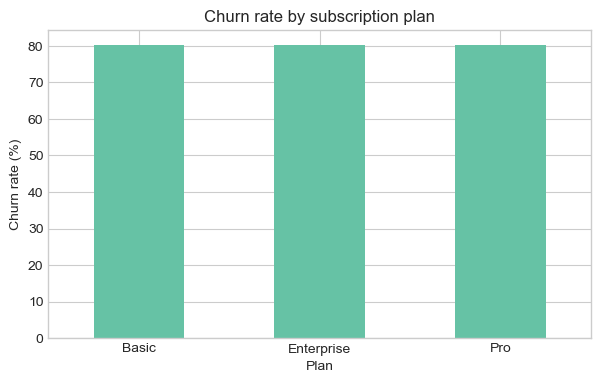

In [36]:
churn_by_plan.plot(kind='bar',figsize=(7,4))
plt.title("Churn rate by subscription plan")
plt.ylabel("Churn rate (%)")
plt.xlabel("Plan")
plt.xticks(rotation=0)
plt.show()

**Insight:** No significant differences were found between tiers - churn is widespread across all customer segments.

In [38]:
churn_by_industry = (
    final_df.groupby("industry")["churn_date"]
    .apply(lambda x: x.notna().mean() *100)
    .sort_values(ascending=False)
)
print("Churn rate by industry:\n",churn_by_industry)

Churn rate by industry:
 industry
DevTools         83.542141
EdTech           80.557904
Cybersecurity    79.756263
FinTech          78.976918
HealthTech       77.517730
Name: churn_date, dtype: float64


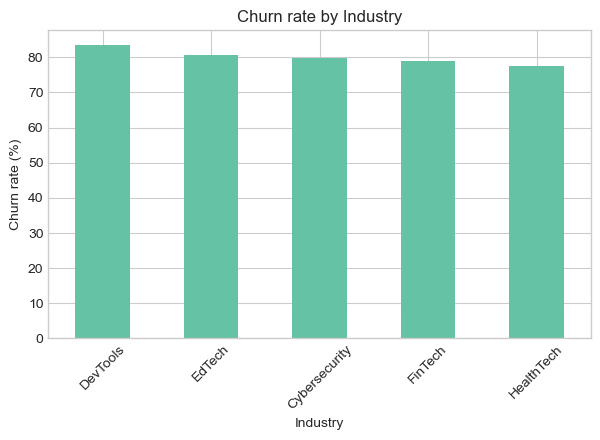

In [39]:
churn_by_industry.plot(kind='bar',figsize=(7,4))
plt.title('Churn rate by Industry')
plt.ylabel('Churn rate (%)')
plt.xlabel('Industry')
plt.xticks(rotation=45)
plt.show()

**Insight:** 
-  Developer-oriented products (DevTools) experience the highest churn, possibly due to market competition or trial testing behavior.
-  HealthTech and FinTech customers show the most stability.

In [41]:
reason_counts = final_df["reason_code"].value_counts(dropna=False)
print("Reasons for resignation:\n",reason_counts)

Reasons for resignation:
 reason_code
NaN           1472
features      1176
budget        1051
support       1023
pricing        908
competitor     900
unknown        899
Name: count, dtype: int64


In [42]:
reasons_counts_clean = final_df["reason_code"].dropna().value_counts()

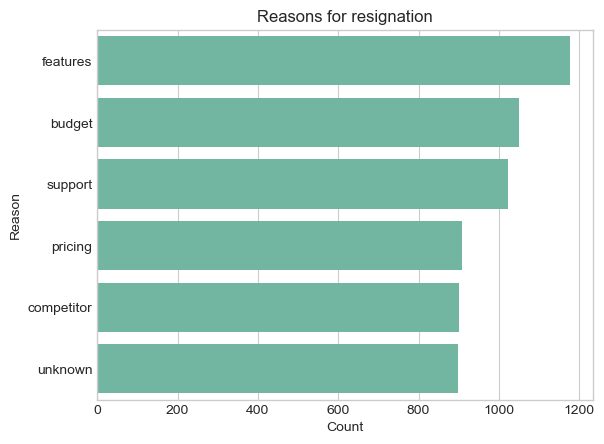

In [43]:
sns.barplot(x=reasons_counts_clean.values,y=reasons_counts_clean.index)
plt.title("Reasons for resignation")
plt.xlabel("Count")
plt.ylabel("Reason")
plt.show()

**Key takeaway:**
-  Most customers cite missing features or budget/pricing as reasons for leaving.
-  A significant number did not provide feedback, suggesting room to improve exit surveys.

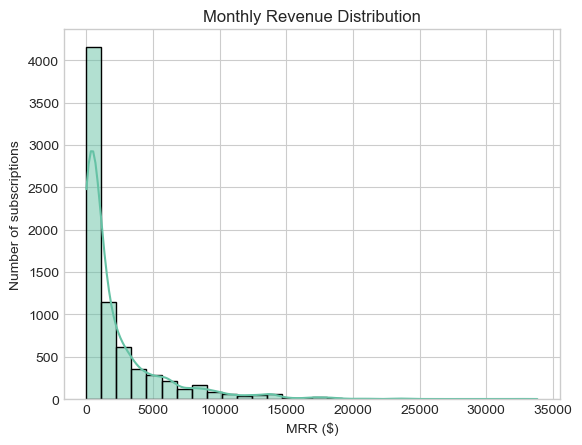

In [85]:
sns.histplot(final_df['mrr_amount'],bins=30,kde=True)
plt.title('Monthly Revenue Distribution')
plt.xlabel('MRR ($)')
plt.ylabel('Number of subscriptions')
plt.show()

A histogram of **MRR (Monthly Recurring Revenue)** shows a right-skewed distribution - most subscriptions contribute smaller MRR values, while a few large enterprise clients account for most revenue.

### Step 5: Preparing data for export

In [89]:
final_df_clean = final_df.copy()

columns_to_keep = [
    'account_id', 'account_name', 'industry', 'country',
    'signup_date', 'referral_source',
    'plan_tier_sub', 'billing_frequency', 'auto_renew_flag',
    'mrr_amount', 'arr_amount', 'is_trial', 
    'upgrade_flag', 'downgrade_flag', 'churn_date',
    'reason_code', 'refund_amount_usd', 'preceding_upgrade_flag',
    'preceding_downgrade_flag', 'is_reactivation'
]

final_df_clean = final_df_clean[[col for col in columns_to_keep if col in final_df_clean.columns]]

print("Columns:")
print(final_df_clean.columns)
print("\nNumber of records:", len(final_df_clean))

Columns:
Index(['account_id', 'account_name', 'industry', 'country', 'signup_date',
       'referral_source', 'plan_tier_sub', 'billing_frequency',
       'auto_renew_flag', 'mrr_amount', 'arr_amount', 'upgrade_flag',
       'downgrade_flag', 'churn_date', 'reason_code', 'refund_amount_usd'],
      dtype='object')

Number of records: 7429


##### Converting date columns to datetime type

In [95]:
date_cols = ['signup_date', 'churn_date']
for col in date_cols:
    if col in final_df_clean.columns:
        final_df_clean[col] = pd.to_datetime(final_df_clean[col], errors='coerce')

##### Converting bool to int

In [ ]:
bool_cols = final_df_clean.select_dtypes(include='bool').columns
for col in bool_cols:
    final_df_clean[col] = final_df_clean[col].astype(int)

##### Export to CSV

In [50]:
final_df_clean.to_csv("final_churn_dataset.csv", index=False, encoding="utf-8-sig")